In [1]:
%matplotlib inline

# Find the centroid of the aperture in TEMCA optical images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import boto3
from skimage import io
from skimage import data
from skimage import feature
from skimage import color
from skimage import filters
from skimage import transform 
from skimage import draw
from skimage import measure
from skimage import morphology
import skdemo
from scipy import ndimage as ndi
from toolbox.TAO.tao import TAO
from toolbox.TAO.taoDB import TAOdb

In [3]:
tao =  TAO()
taoDB = TAOdb()
url = taoDB.get_aperture_image_url('donaldtrump', 'test1', '000040')
im = io.imread(url)

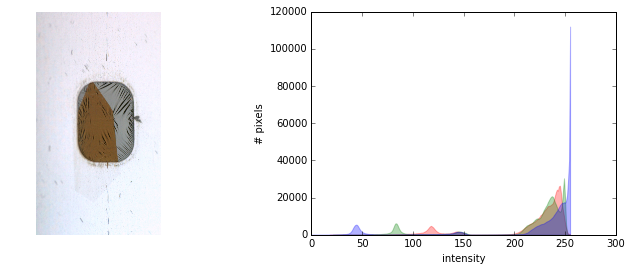

In [4]:
# crop the image to the interesting part
xoff = 700
imc = im[:, xoff:1300, :]
imgray = color.rgb2gray(imc)
skdemo.imshow_with_histogram(imc);

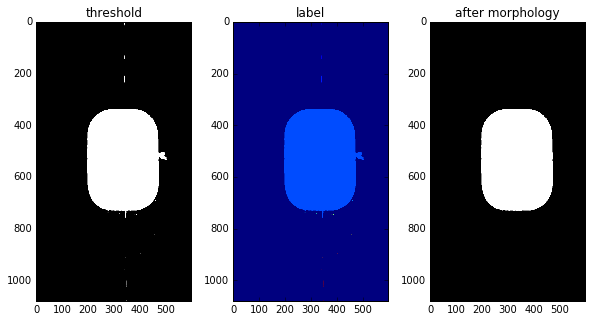

In [9]:
# threshold
threshold = filters.threshold_otsu(imgray)
imb = imgray <= threshold

# label it
imlabel = morphology.label(imb)

# remove small blobs
imnosmall = morphology.remove_small_objects(imlabel, min_size=4000, connectivity=1, in_place=False)

# fill small holes
imnosmall = morphology.remove_small_holes(imnosmall, min_size=200, connectivity=2, in_place=False)

# trim tendrils
se = morphology.disk(11)
imnosmall = morphology.opening(imnosmall, se)

fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize=(10, 5))
ax_1.imshow(imb)
ax_1.set_title('threshold')
ax_2.imshow(imlabel, cmap='jet')
ax_2.set_title('label')
ax_3.imshow(imnosmall, cmap='gray')
ax_3.set_title('after morphology')

In [11]:
# show the centroid and other shape measurements
imint = imnosmall.astype(int)
imlabel = measure.label(imint, connectivity=1)
improps = measure.regionprops(imlabel)
region = improps[0]
print(region.centroid)

for prop in region:
    print(prop, region[prop])

(535.35006425889765, 333.97995324785722)
('area', 98819)
('bbox', (339L, 196L, 733L, 475L))
('centroid', (535.35006425889765, 333.97995324785722))
('convex_area', 99639)
('convex_image', array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool))
('coords', array([[339, 324],
       [339, 330],
       [339, 331],
       ..., 
       [732, 346],
       [732, 347],
       [732, 348]], dtype=int64))
('eccentricity', 0.7081598579886749)
('equivalent_diameter', 354.71151457372235)
('euler_number', 1L)
('extent', 0.89895929989265511)
('filled_area', 98819)
('filled_image', array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [Fal